In [35]:
from impedance.models.circuits.elements import element
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mpmath import *
from models import *

In [36]:
R1=2000
R2=1000
Q=1e-3
delta1=0.9
alpha=1

# R1, R1Q, R2Q, delta1, alpha = 1000, 1000*1e-4, 2000*1e-4, 0.4, 1

param_to_sim=[R1, R1*Q, R2*Q, delta1, alpha]
c_sim_two=CustomCircuit(initial_guess=param_to_sim,circuit="TLMtwo")

freq=np.logspace(-2,3,100)

z_sim_two=c_sim_two.predict(frequencies=freq)

#add noise to the plot
z_sim_two_noisy=(np.real(z_sim_two)+np.real(z_sim_two)*np.random.uniform(-0.05,0.05,size=z_sim_two.shape))+1j*(np.imag(z_sim_two)+np.imag(z_sim_two)*np.random.uniform(-0.05,0.05,size=z_sim_two.shape))

# plt.plot(np.real(z_sim_two),-np.imag(z_sim_two))
# plt.gca().set_aspect("equal")

In [37]:
param_to_fit=[R1*1.2, R1*Q*1.2, R2*Q*1.7, 0.4, alpha]
c_fit_two=CustomCircuit(initial_guess=param_to_fit,circuit="TLMtwo")
#one for the fitting noisy data
c_fit_two_noisy=CustomCircuit(initial_guess=param_to_fit,circuit="TLMtwo")

#fit the clean data
c_fit_two.fit(impedance=z_sim_two,frequencies=freq,bounds=((0,0,0,0,0.5),(np.inf,np.inf,np.inf,1,1)))
z_fit_two=c_fit_two.predict(frequencies=freq)

#fit the noisy data
c_fit_two_noisy.fit(impedance=z_sim_two_noisy,frequencies=freq,bounds=((0,0,0,0,0.5),(np.inf,np.inf,np.inf,1,1)))
z_fit_two_noisy=c_fit_two.predict(frequencies=freq)

R1_fit=c_fit_two.parameters_[0]
Q_fit=c_fit_two.parameters_[1]/c_fit_two.parameters_[0]
R2_fit=c_fit_two.parameters_[2]/Q_fit
delta1_fit=c_fit_two.parameters_[3]
alpha_fit=c_fit_two.parameters_[4]

R1_fit_noisy=c_fit_two_noisy.parameters_[0]
Q_fit_noisy=c_fit_two_noisy.parameters_[1]/c_fit_two_noisy.parameters_[0]
R2_fit_noisy=c_fit_two_noisy.parameters_[2]/Q_fit_noisy
delta1_fit_noisy=c_fit_two_noisy.parameters_[3]
alpha_fit_noisy=c_fit_two_noisy.parameters_[4]

In [38]:
print(c_fit_two)
print(c_fit_two_noisy)


Circuit string: TLMtwo
Fit: True

Initial guesses:
  TLMtwo_0 = 2.40e+03 [Ohm]
  TLMtwo_1 = 2.40e+00 [Ohm F]
  TLMtwo_2 = 1.70e+00 [Ohm F]
  TLMtwo_3 = 4.00e-01 []
  TLMtwo_4 = 1.00e+00 []

Fit parameters:
  TLMtwo_0 = 2.00e+03  (+/- 3.13e-10) [Ohm]
  TLMtwo_1 = 2.00e+00  (+/- 3.26e-13) [Ohm F]
  TLMtwo_2 = 1.00e+00  (+/- 8.08e-08) [Ohm F]
  TLMtwo_3 = 9.00e-01  (+/- 2.70e-09) []
  TLMtwo_4 = 1.00e+00  (+/- 6.71e-15) []


Circuit string: TLMtwo
Fit: True

Initial guesses:
  TLMtwo_0 = 2.40e+03 [Ohm]
  TLMtwo_1 = 2.40e+00 [Ohm F]
  TLMtwo_2 = 1.70e+00 [Ohm F]
  TLMtwo_3 = 4.00e-01 []
  TLMtwo_4 = 1.00e+00 []

Fit parameters:
  TLMtwo_0 = 1.98e+03  (+/- 1.04e+02) [Ohm]
  TLMtwo_1 = 1.97e+00  (+/- 1.07e-01) [Ohm F]
  TLMtwo_2 = 2.11e+00  (+/- 5.25e+00) [Ohm F]
  TLMtwo_3 = 5.40e-01  (+/- 6.38e+00) []
  TLMtwo_4 = 1.00e+00  (+/- 1.86e-03) []



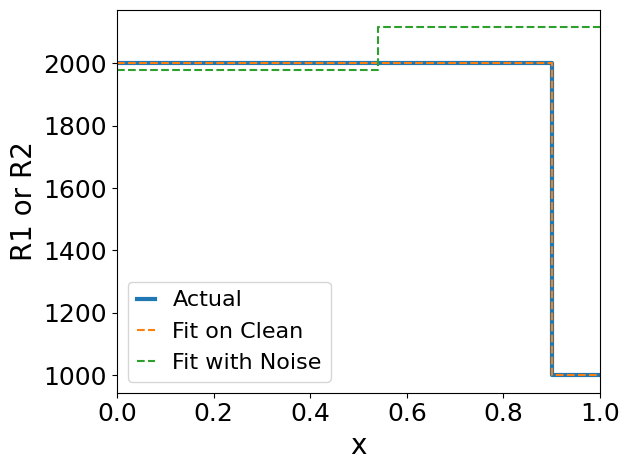

In [39]:
fig, ax=plt.subplots()
x=np.linspace(0,1)
#plot the original data R1 and R2 values
ax.plot([0,delta1,delta1,1],[R1,R1,R2,R2],linewidth=3)

#plot the fitted R1 and R2 values
ax.plot([0,delta1_fit,delta1_fit,1],[R1_fit,R1_fit,R2_fit,R2_fit],linestyle="--")

#plot the fitted R1 and R2 values
ax.plot([0,delta1_fit_noisy,delta1_fit_noisy,1],[R1_fit_noisy,R1_fit_noisy,R2_fit_noisy,R2_fit_noisy],linestyle="--")

ax.set_xlabel("x",fontsize=20)
ax.set_ylabel("R1 or R2",fontsize=20)
ax.set_xmargin(0)
ax.legend(["Actual","Fit on Clean","Fit with Noise"],fontsize=16,handlelength=0.8)
ax.tick_params(labelsize=18)
# ax.grid(True)
fig.tight_layout()
fig.savefig("as.png",dpi=500)
# ax.legend(fontsize=16,handlelength=0.8)

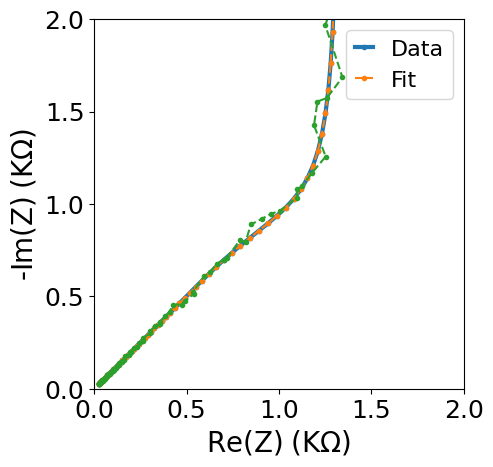

In [40]:
fig2,ax2=plt.subplots()
#plot the original nyquist plot
ax2.plot(np.real(z_fit_two)/1000,-np.imag(z_fit_two)/1000,linewidth=3,marker=".")

#plot the fitted nyquist plot
ax2.plot(np.real(z_sim_two)/1000,-np.imag(z_sim_two)/1000,linestyle="--",marker=".")

#plot noisy nyquist
ax2.plot(np.real(z_sim_two_noisy)/1000,-np.imag(z_sim_two_noisy)/1000,linestyle="--",marker=".")


ax2.set_aspect("equal")
ax2.set_xlabel("Re(Z)$\;($K$\Omega$)",fontsize=20)
ax2.set_ylabel("-Im(Z)$\;($K$\Omega$)",fontsize=20)
# ax.set_title("Nyquist Plot")
ax2.set_xlim(0,2)
ax2.set_ylim(0,2)
ax2.tick_params(labelsize=18)
ax2.legend(["Data","Fit"],fontsize=16,handlelength=0.8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


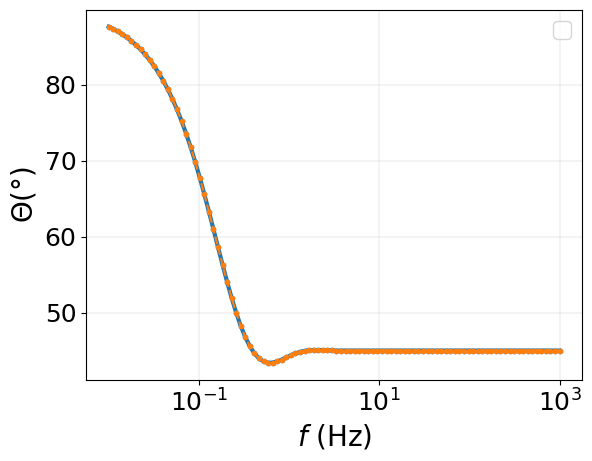

In [41]:
fig3, ax3= plt.subplots()
ax3.plot(freq,-np.angle(z_fit_two,deg=True),linewidth=3,marker=".")

ax3.plot(freq,-np.angle(z_sim_two,deg=True),linestyle="--",marker=".")

ax3.set_ylabel("$\Theta (\degree)$",fontsize=20)
ax3.set_xlabel("$f$ (Hz)",fontsize=20)
ax3.set_xscale("log")
# ax3.set_ylim(32,50)
# ax3.set_xlim(1,1e3)
ax3.grid(linewidth=0.2)
# ax2.set_title("Phase Angle Plot")
ax3.tick_params(labelsize=18)
ax3.legend(fontsize=16,handlelength=0.8)